In [1]:
import os
print('Working Directory: {}'.format(os.getcwd()))

Working Directory: C:\Users\SUJITH KUMAR\Downloads\Insurance-master


## Data Import 

In [2]:
import pandas as pd
import numpy as np

data = pd.ExcelFile('Data-All.xlsx')
print(data.sheet_names)
df1 = data.parse('Sheet1')
#df1.info()

['Sheet1']


In [3]:
print('Shape of Data: {}'.format(df1.shape))
print('Dimentions of data:',df1.ndim)
print('Data Index:',df1.index)

Shape of Data: (39782, 34)
Dimentions of data: 2
Data Index: RangeIndex(start=0, stop=39782, step=1)


In [4]:
# Replace the spaces in clumn names to underscore and convert column headers to lower case

df1.columns = df1.columns.str.replace(' ','_')
df1.columns = df1.columns.str.lower()

In [5]:
df1.head()

,claim,effective_year,account,market,sex,jurisdiction_state,accident_state,classcode,class_desription,occupation,...,body_part_group,cause_of_injury,case_of_injury_group,nature_of_injury,nature_of_injury_group,total_incurred_amount,indemnity,medical,expenses,sum_(medical-indemnity-expenses)
0,24209433,2015,832735,FRUIT & VEG GROWER/SHIPPER/PACKER,NaN,CA,CA,40,NaN,FARM LABORER,...,NaN,NaN,NaN,NaN,NaN,0.00,174.92,101.84,28.09,304.85
1,24125802,2015,832735,FRUIT & VEG GROWER/SHIPPER/PACKER,NaN,CA,CA,40,NaN,FARM LABORER,...,NaN,NaN,NaN,NaN,NaN,0.00,157.60,218.65,30.56,406.81
2,24274218,2015,832735,FRUIT & VEG GROWER/SHIPPER/PACKER,NaN,CA,CA,40,NaN,FARM LABORER,...,NaN,NaN,NaN,NaN,NaN,0.00,296.83,242.48,30.56,569.87
3,2427360,2015,618523,OTHER,NaN,TX,TX,8810,CLERICAL OFFICE OR LIBRARIES,LABORER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,843291,2009,748045,NURSERY/GREENHOUSE WHOLESALE,M,MN,MN,5,NURSERY EMPLOYEES,SHIPPING MGR,...,Neck,FROM DIFFERENT LEVEL (ELEVATIO,"Fall, Slip, or Trip Injury",MULTIPLE PHYSICAL INJURIES ONL,Multiple Injuries,54579.79,12265.75,42314.04,0.00,54579.79


## Data Engineering

In [6]:
df2 = df1

In [7]:
df2.market.value_counts()

GRAIN ELEVATORS                                      7404
RACE CAR OWNERS, RACING TEAMS                        4097
REFINED FUEL (inc. Cstores)                          3198
IMPLEMENT DEALER                                     2359
AG SUPPLY/FARM STORES                                2191
EGG LAYING AND PROCESSORS                            1990
FEEDMILLS FOR LIVESTOCK AND PET FOODS                1836
FOOD DISTRIBUTORS                                    1426
FERTILIZER BLENDING & DISTRIBUTION                   1284
OTHER                                                1131
FRUIT & VEG GROWER/SHIPPER/PACKER                    1003
NURSERY/GREENHOUSE WHOLESALE                          992
MEAT PROCESSING (OTHER THAN POULTRY)                  851
ETHANOL                                               776
BOTTLERS/BEVERAGE DISTRIBUTORS                        618
FRUIT & VEGETABLE PROCESSING                          612
HOG CONFINEMENT                                       597
CATTLE FEEDLOT

In [8]:
df2.market.describe()

count               39782
unique                 49
top       GRAIN ELEVATORS
freq                 7404
Name: market, dtype: object

In [9]:
df2 = df2[df2.market != 'RACE CAR OWNERS, RACING TEAMS']
df2 = df2[df2.market != 'NURSERY/GREENHOUSE WHOLESALE']

In [10]:
df2.market.describe()

count               34693
unique                 47
top       GRAIN ELEVATORS
freq                 7404
Name: market, dtype: object

In [11]:
df2.market = df2.market.str.replace('CONSTRUCTION EQUIP DEALER', 'OTHERS')
df2.market = df2.market.str.replace('FARM LABOR CONTRACTORS', 'OTHERS')
df2.market = df2.market.str.replace('TIRE DEALERS', 'OTHERS')
df2.market = df2.market.str.replace('BROKERED SALES/COMMODITIES TRADING', 'OTHERS')
df2.market = df2.market.str.replace('PASTA MANUFACTURING', 'OTHERS')
df2.market = df2.market.str.replace('CUSTOM HARVESTING', 'OTHERS')
df2.market = df2.market.str.replace('OIL EXTRACTION - SOYBEAN/COTTONSEED', 'OTHERS')
df2.market = df2.market.str.replace('DAIRY FARMS', 'OTHERS')
df2.market = df2.market.str.replace('COTTON GIN/WAREHOUSE', 'OTHERS')
df2.market = df2.market.str.replace('OIL RECYCLING', 'OTHERS')
df2.market = df2.market.str.replace('CANDY MANUFACTURERS & DISTRIBUTORS', 'OTHERS')
df2.market = df2.market.str.replace('MILK HAULING ONLY', 'OTHERS')
df2.market = df2.market.str.replace('COMMERCIAL FARM/FRUIT & VEG GROWER', 'OTHERS')
df2.market = df2.market.str.replace('FISH GROWING/PROCESSING (inc. Frozen)', 'OTHERS')
df2.market = df2.market.str.replace('EQUIPMENT MANUFACTURING', 'OTHERS')
df2.market = df2.market.str.replace('BIO-DIESEL', 'OTHERS')

df2.market = df2.market.str.replace('TRUCKING ONLY', 'OTHERS')
df2.market = df2.market.str.replace('BAKERIES, COMMERCIAL AND RETAIL', 'OTHERS')
df2.market = df2.market.str.replace('MUSHROOM SERVICES', 'OTHERS')
df2.market = df2.market.str.replace('NUTS & LEGUMES FOR HUMAN CONSUMPTION', 'OTHERS')
df2.market = df2.market.str.replace('FROZEN SPECIALTY FOOD MANUFACTURING', 'OTHERS')
df2.market = df2.market.str.replace('LPG', 'OTHERS')
df2.market = df2.market.str.replace('NURSERY/GREENHOUSE RETAIL', 'OTHERS')
df2.market = df2.market.str.replace('FISH GROWING/PROCESSING (inc. Frozen)', 'OTHERS')

In [12]:
df2.market.value_counts()

GRAIN ELEVATORS                                      7404
REFINED FUEL (inc. Cstores)                          3198
OTHERS                                               2918
IMPLEMENT DEALER                                     2359
AG SUPPLY/FARM STORES                                2191
EGG LAYING AND PROCESSORS                            1990
FEEDMILLS FOR LIVESTOCK AND PET FOODS                1836
FOOD DISTRIBUTORS                                    1426
FERTILIZER BLENDING & DISTRIBUTION                   1284
OTHER                                                1131
FRUIT & VEG GROWER/SHIPPER/PACKER                    1003
MEAT PROCESSING (OTHER THAN POULTRY)                  851
ETHANOL                                               776
BOTTLERS/BEVERAGE DISTRIBUTORS                        618
FRUIT & VEGETABLE PROCESSING                          612
HOG CONFINEMENT                                       597
CATTLE FEEDLOTS                                       593
AG CHEMICAL DI

In [13]:
df2.market.describe()

count               34693
unique                 26
top       GRAIN ELEVATORS
freq                 7404
Name: market, dtype: object

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34693 entries, 0 to 39781
Data columns (total 34 columns):
claim                               34693 non-null int64
effective_year                      34693 non-null int64
account                             34693 non-null int64
market                              34693 non-null object
sex                                 34689 non-null object
jurisdiction_state                  34692 non-null object
accident_state                      34693 non-null object
classcode                           34693 non-null object
class_desription                    34564 non-null object
occupation                          34693 non-null object
date_of_birth                       34692 non-null datetime64[ns]
date_of_hire                        34693 non-null datetime64[ns]
accident_date                       34693 non-null datetime64[ns]
experience_years                    34693 non-null float64
age_at_accident_date                34693 non-null float6

## Feature Selection

In [15]:
# Removal of top of four rows
df3 = df2[4:]
df3.shape

(34689, 34)

In [16]:
# Features to be removed from the data
print('Removing features...')
print(df3.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]])
df3.drop(df3.columns[[0, 1, 2, 5, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 25, 28, 29, 30, 31, 32, 33]], axis=1, inplace=True)

Removing features...
Index(['claim', 'effective_year', 'account', 'jurisdiction_state',
       'class_desription', 'date_of_birth', 'date_of_hire', 'accident_date',
       'date_reported_to_employer', 'report_date', 'date_of_disability',
       'date_returened_to_work', 'claim_description', 'claim_status',
       'type_of_injury_code', 'body_part', 'cause_of_injury',
       'nature_of_injury_group', 'total_incurred_amount', 'indemnity',
       'medical', 'expenses', 'sum_(medical-indemnity-expenses)'],
      dtype='object')


C:\Users\SUJITH KUMAR\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34689 entries, 6 to 39781
Data columns (total 11 columns):
market                  34689 non-null object
sex                     34689 non-null object
accident_state          34689 non-null object
classcode               34689 non-null object
occupation              34689 non-null object
experience_years        34689 non-null float64
age_at_accident_date    34689 non-null float64
type_of_injury          34689 non-null object
body_part_group         34689 non-null object
case_of_injury_group    34689 non-null object
nature_of_injury        34689 non-null object
dtypes: float64(2), object(9)
memory usage: 3.2+ MB


In [18]:
# Number of unique rows in all the columns
for col in df3.columns:
    print(col, df3[col].nunique())

market 26
sex 3
accident_state 50
classcode 211
occupation 6939
experience_years 3328
age_at_accident_date 5544
type_of_injury 7
body_part_group 7
case_of_injury_group 11
nature_of_injury 49


In [19]:
df3.case_of_injury_group.value_counts()

Strain or Injury by                9444
Fall, Slip, or Trip Injury         7823
Struck or Injured by               4813
Cut, Puncture, Scrape              3631
Miscellaneous                      3391
Caught In, Under, or Between       1342
Heat or Cold Exposures             1286
Vehicle                            1164
Striking Against or Stepping On    1099
Lifting or Handling                 648
Rubbed or Abraded by                 48
Name: case_of_injury_group, dtype: int64

In [20]:
searchfor = ['Rubbed or Abraded by', 'Lifting or Handling','Striking Against or Stepping On', 'Vehicle','Caught In, Under, or Between']
df3 = df3[~df3.case_of_injury_group.str.contains('|'.join(searchfor))]

In [21]:
df3['case_of_injury_group'].value_counts()

Strain or Injury by           9444
Fall, Slip, or Trip Injury    7823
Struck or Injured by          4813
Cut, Puncture, Scrape         3631
Miscellaneous                 3391
Heat or Cold Exposures        1286
Name: case_of_injury_group, dtype: int64

In [22]:
df3.case_of_injury_group.tail(20)

38943           Strain or Injury by
38944    Fall, Slip, or Trip Injury
38945           Strain or Injury by
38946    Fall, Slip, or Trip Injury
38947          Struck or Injured by
38948    Fall, Slip, or Trip Injury
38949           Strain or Injury by
38950                 Miscellaneous
38951         Cut, Puncture, Scrape
39053          Struck or Injured by
39054                 Miscellaneous
39055           Strain or Injury by
39056           Strain or Injury by
39057         Cut, Puncture, Scrape
39099           Strain or Injury by
39129    Fall, Slip, or Trip Injury
39219           Strain or Injury by
39246                 Miscellaneous
39780          Struck or Injured by
39781    Fall, Slip, or Trip Injury
Name: case_of_injury_group, dtype: object

In [23]:
text_label = ['Cut, Puncture, Scrape', 'Fall, Slip, or Trip Injury', 
                    'Heat or Cold Exposures', 'Miscellaneous', 'Strain or Injury by', 'Struck or Injured by'
        ]
text_label

['Cut, Puncture, Scrape',
 'Fall, Slip, or Trip Injury',
 'Heat or Cold Exposures',
 'Miscellaneous',
 'Strain or Injury by',
 'Struck or Injured by']

In [24]:
check = df3['case_of_injury_group'].value_counts()
check

Strain or Injury by           9444
Fall, Slip, or Trip Injury    7823
Struck or Injured by          4813
Cut, Puncture, Scrape         3631
Miscellaneous                 3391
Heat or Cold Exposures        1286
Name: case_of_injury_group, dtype: int64

## Standardization and Normalization

In [25]:
# Standardization of features
df3["experience_years"] = (df3["experience_years"]-df3["experience_years"].min()) / (df3["experience_years"].max()-df3["experience_years"].min())
df3["age_at_accident_date"] = (df3["age_at_accident_date"]-df3["age_at_accident_date"].min()) / (df3["age_at_accident_date"].max()-df3["age_at_accident_date"].min())

In [26]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df3['market'] = LE.fit_transform(df3['market'])
df3['type_of_injury'] = LE.fit_transform(df3['type_of_injury'])
df3['case_of_injury_group'] = LE.fit_transform(df3['case_of_injury_group'])
df3['nature_of_injury'] = LE.fit_transform(df3['nature_of_injury'])
df3['body_part_group'] = LE.fit_transform(df3['body_part_group'])
df3['occupation'] = LE.fit_transform(df3['occupation'].astype(str))
df3['accident_state'] = LE.fit_transform(df3['accident_state'])
df3['sex'] = LE.fit_transform(df3['sex'])
df3['classcode'] = LE.fit_transform(df3['classcode'].astype(str))

In [27]:
# Standardization

df3["nature_of_injury"] = (df3["nature_of_injury"]-df3["nature_of_injury"].min()) / (df3["nature_of_injury"].max()-df3["nature_of_injury"].min())
df3["accident_state"] = (df3["accident_state"]-df3["accident_state"].min()) / (df3["accident_state"].max()-df3["accident_state"].min())
df3["type_of_injury"] = (df3["type_of_injury"]-df3["type_of_injury"].min()) / (df3["type_of_injury"].max()-df3["type_of_injury"].min())
df3["occupation"] = (df3["occupation"]-df3["occupation"].min()) / (df3["occupation"].max()-df3["occupation"].min())
df3["classcode"] = (df3["classcode"]-df3["classcode"].min()) / (df3["classcode"].max()-df3["classcode"].min())
df3["body_part_group"] = (df3["body_part_group"]-df3["body_part_group"].min()) / (df3["body_part_group"].max()-df3["body_part_group"].min())
df3["market"] = (df3["market"]-df3["market"].min()) / (df3["market"].max()-df3["market"].min())
df3["sex"] = (df3["sex"]-df3["sex"].min()) / (df3["sex"].max()-df3["sex"].min())

In [28]:
df3.head()

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
6,0.52,0.5,0.040816,0.061905,0.462158,0.115312,0.506133,0.000000,0.500000,5,0.680851
7,0.44,0.5,0.040816,0.061905,0.519513,0.086700,0.567563,0.333333,0.166667,5,0.680851
8,0.44,0.0,0.040816,0.061905,0.636277,0.086386,0.626362,1.000000,0.500000,1,0.680851
9,0.44,0.5,0.979592,0.061905,0.223574,0.176466,0.682529,0.333333,0.500000,1,0.680851
11,0.20,0.0,0.428571,0.223810,0.474325,0.088036,0.643681,0.333333,1.000000,1,0.680851


In [29]:
df3.case_of_injury_group.tail(20)

38943    4
38944    1
38945    4
38946    1
38947    5
38948    1
38949    4
38950    3
38951    0
39053    5
39054    3
39055    4
39056    4
39057    0
39099    4
39129    1
39219    4
39246    3
39780    5
39781    1
Name: case_of_injury_group, dtype: int32

In [30]:
# Feature Correlation
df3.corr(method ='pearson')

,market,sex,accident_state,classcode,occupation,experience_years,age_at_accident_date,type_of_injury,body_part_group,case_of_injury_group,nature_of_injury
market,1.000000,-0.040357,0.142586,0.153284,0.024324,0.018922,0.015014,0.017401,0.018604,-0.032656,0.003976
sex,-0.040357,1.000000,0.025290,-0.008382,0.097499,0.070150,0.018162,0.028409,-0.016687,0.011119,0.024217
accident_state,0.142586,0.025290,1.000000,0.045100,0.035694,0.001381,-0.012261,0.017286,0.015983,-0.006094,0.012610
classcode,0.153284,-0.008382,0.045100,1.000000,0.023151,0.034119,0.048615,0.015039,-0.027259,0.006426,0.007381
occupation,0.024324,0.097499,0.035694,0.023151,1.000000,0.017070,0.004347,-0.008972,0.003517,0.021295,0.011432
experience_years,0.018922,0.070150,0.001381,0.034119,0.017070,1.000000,0.385060,0.014707,0.011802,-0.003194,0.020341
age_at_accident_date,0.015014,0.018162,-0.012261,0.048615,0.004347,0.385060,1.000000,0.111530,0.011613,-0.017428,0.034341
type_of_injury,0.017401,0.028409,0.017286,0.015039,-0.008972,0.014707,0.111530,1.000000,0.040642,0.020126,0.070322
body_part_group,0.018604,-0.016687,0.015983,-0.027259,0.003517,0.011802,0.011613,0.040642,1.000000,-0.048348,0.238545
case_of_injury_group,-0.032656,0.011119,-0.006094,0.006426,0.021295,-0.003194,-0.017428,0.020126,-0.048348,1.000000,0.092210


## Data Separation

In [31]:
features = df3.drop('case_of_injury_group', 1)
labels = df3[['case_of_injury_group']]

In [32]:
features.shape

(30388, 10)

In [33]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print('Number of train and test data:')
print(number_of_train, number_of_test)

Number of train and test data:
24310 6078


In [34]:
"""
from imblearn.over_sampling import SMOTE
sm = SMOTE('minority')
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)
print(x_train_res.shape, y_train_res.shape)
"""

"\nfrom imblearn.over_sampling import SMOTE\nsm = SMOTE('minority')\nx_train_res, y_train_res = sm.fit_sample(X_train, Y_train)\nprint(x_train_res.shape, y_train_res.shape)\n"

In [35]:
from keras.utils import to_categorical
#one-hot encode target column
train_y_2 = to_categorical(Y_train)
test_y_2 = to_categorical(Y_test)

#vcheck that target column has been converted
train_y_2[0:5]

Using TensorFlow backend.


array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add layers to model
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))


model.add(Dense(6, activation='softmax'))


In [47]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
from keras.callbacks import EarlyStopping 
early_stopping_monitor = EarlyStopping(patience=10)

#train model
history = model.fit(X_train, train_y_2, epochs=20, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 19448 samples, validate on 4862 samples
Epoch 1/20
19448/19448 [==============================] - 2s 108us/step - loss: 1.2296 - acc: 0.4942 - val_loss: 1.1976 - val_acc: 0.5337
Epoch 2/20
19448/19448 [==============================] - 1s 68us/step - loss: 1.0488 - acc: 0.5814 - val_loss: 0.9851 - val_acc: 0.6189
Epoch 3/20
19448/19448 [==============================] - 1s 69us/step - loss: 0.9886 - acc: 0.6073 - val_loss: 0.9819 - val_acc: 0.5934
Epoch 4/20
19448/19448 [==============================] - 2s 87us/step - loss: 0.9675 - acc: 0.6137 - val_loss: 1.0924 - val_acc: 0.5897
Epoch 5/20
19448/19448 [==============================] - 2s 118us/step - loss: 0.9493 - acc: 0.6198 - val_loss: 0.9551 - val_acc: 0.6222
Epoch 6/20
19448/19448 [==============================] - 3s 135us/step - loss: 0.9342 - acc: 0.6280 - val_loss: 0.9304 - val_acc: 0.6234
Epoch 7/20
19448/19448 [==============================] - 2s 84us/step - loss: 0.9482 - acc: 0.6217 - val_loss: 0.9208 - val_a

Training Accuracy: 0.650, Test Accuracy: 0.648


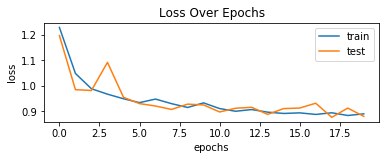

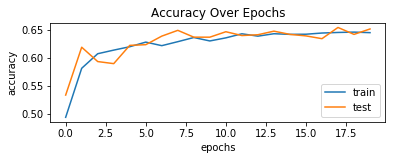

In [49]:
# Evaluate Model

_, train_acc = model.evaluate(X_train, train_y_2, verbose = 0)
_, test_acc = model.evaluate(X_test, test_y_2, verbose = 0)
print('Training Accuracy: %.3f, Test Accuracy: %.3f' %(train_acc, test_acc))

from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss Over Epochs')
pyplot.xlabel('epochs')
pyplot.ylabel('loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy Over Epochs')
pyplot.xlabel('epochs')
pyplot.ylabel('accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
__________

In [51]:
y_score = model.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_y_2.argmax(axis=1), y_score.argmax(axis=1))
print(cnf_matrix)

[[ 626   14    0   16   17   97]
 [  42  759    1   81  380  258]
 [   2    7  202   26    6   13]
 [  37   96    5  445   47   64]
 [  11  369    0   59 1453   26]
 [ 100  214    0   92   57  456]]


In [53]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

Normalized confusion matrix


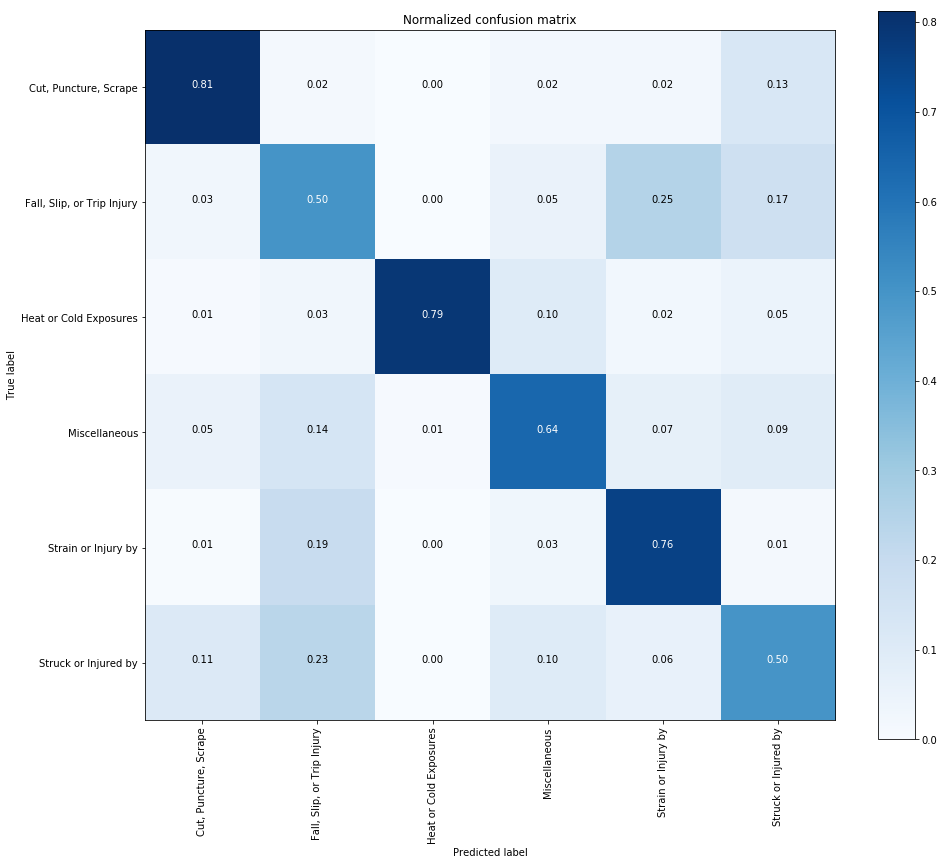

In [54]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools  
    import matplotlib.pyplot as plt
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#y_pred = model.predict(x_test);
#cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(text_label), normalize=True,
                      title='Normalized confusion matrix')

#fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)


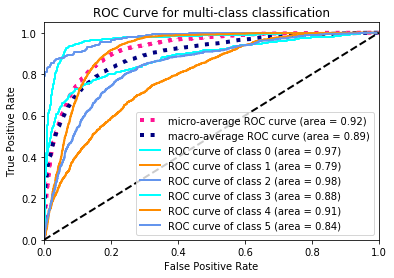

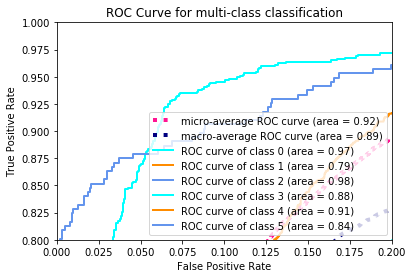

In [55]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes = 6

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y_2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()